In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import math
from scipy.stats import f
import numpy as np

# Wstƒôpna obr√≥bka danych

In [ ]:
data = pd.ExcelFile('daneProj3.xlsx')
# Wczytanie pierwszego arkusza
df = data.parse('Arkusz1')
print("Informacje o danych:")
print(df.info())

Informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nazwa               380 non-null    object 
 1   gestoscZaludnienia  380 non-null    float64
 2   ludnoscTys          380 non-null    float64
 3   wskUrban            380 non-null    float64
 4   turystyka           380 non-null    int64  
 5   wynagrodzenie       380 non-null    float64
 6   bezrobocie          380 non-null    float64
 7   odpadyTysTon        380 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 23.9+ KB
None


In [ ]:
# Wykluczenie kolumny z nazwami powiat√≥w
if 'Nazwa' in df.columns:
    df = df.drop(columns=['Nazwa'])

# Definiowanie zmiennej zale≈ºnej i obja≈õniajƒÖcych
df_y = df[['odpadyTysTon']]

df.drop(columns=['odpadyTysTon'])


gestoscZaludnienia  ludnoscTys  wskUrban  turystyka  wynagrodzenie  \
0                  67.5       87.92      47.1         17        6181.60   
1                 200.3       95.86      78.2         19        5723.65   
2                 193.3       85.69      73.4          9        5856.76   
3                  44.3       32.74      41.1          1        5423.11   
4                  81.9       47.58      53.6         14        6142.84   
..                  ...         ...       ...        ...            ...   
375                35.6       50.39      61.0         21        5886.05   
376                31.7       33.76      53.8          6        5630.58   
377              1060.0      104.24     100.0         17        6054.77   
378              1302.5      391.57     100.0         59        6943.84   
379               194.8       39.37     100.0         92        6061.29   

     bezrobocie  
0           3.1  
1           5.2  
2           6.4  
3          13.8  
4          10.2  
..          ...  
375         8.5  
376        15.2  
377         5.1  
378         3.1  
379         4.0  

[380 rows x 6 columns]

In [ ]:
print("\nPodglƒÖd przyk≈ÇƒÖdowych danych:")
df.head()


PodglƒÖd przyk≈ÇƒÖdowych danych:


gestoscZaludnienia  ludnoscTys  wskUrban  turystyka  wynagrodzenie  \
0                67.5       87.92      47.1         17        6181.60   
1               200.3       95.86      78.2         19        5723.65   
2               193.3       85.69      73.4          9        5856.76   
3                44.3       32.74      41.1          1        5423.11   
4                81.9       47.58      53.6         14        6142.84   

   bezrobocie  odpadyTysTon  
0         3.1         10.56  
1         5.2         59.76  
2         6.4         17.89  
3        13.8         25.50  
4        10.2         31.36

In [ ]:
# Sprawdzanie brakujƒÖcych danych
missing_data = df.isnull().sum()
print("\nBrakujƒÖce dane w kolumnach:")
print(missing_data)


BrakujƒÖce dane w kolumnach:
gestoscZaludnienia    0
ludnoscTys            0
wskUrban              0
turystyka             0
wynagrodzenie         0
bezrobocie            0
odpadyTysTon          0
dtype: int64


In [ ]:
# Podstawowe statystyki opisowe
descriptive_stats = df.describe()
print("\nPodstawowe statystyki opisowe:")
print(descriptive_stats)


Podstawowe statystyki opisowe:
       gestoscZaludnienia   ludnoscTys    wskUrban   turystyka  wynagrodzenie  \
count          380.000000   380.000000  380.000000  380.000000     380.000000   
mean           355.416842    99.385579   50.347105   25.700000    5826.572158   
std            627.797215   123.772237   27.426508   49.233486     705.880874   
min             18.200000    18.800000    0.000000    0.000000    4668.600000   
25%             57.850000    51.992500   30.575000    6.000000    5410.520000   
50%             89.800000    74.215000   44.850000   11.000000    5670.970000   
75%            180.075000   108.192500   63.300000   22.000000    6031.412500   
max           3600.100000  1861.980000  100.000000  441.000000   11361.510000   

       bezrobocie  odpadyTysTon  
count  380.000000    380.000000  
mean     7.263684     35.316895  
std      3.994963     53.449047  
min      1.000000      4.220000  
25%      4.400000     15.402500  
50%      6.350000     23.570000  


üìå widzimy potrzebƒô do przeprowadzenia standaryzacji danych poniewa≈º regresja liniowa jest podatna na r√≥≈ºne skale danych obja≈õniajƒÖcych

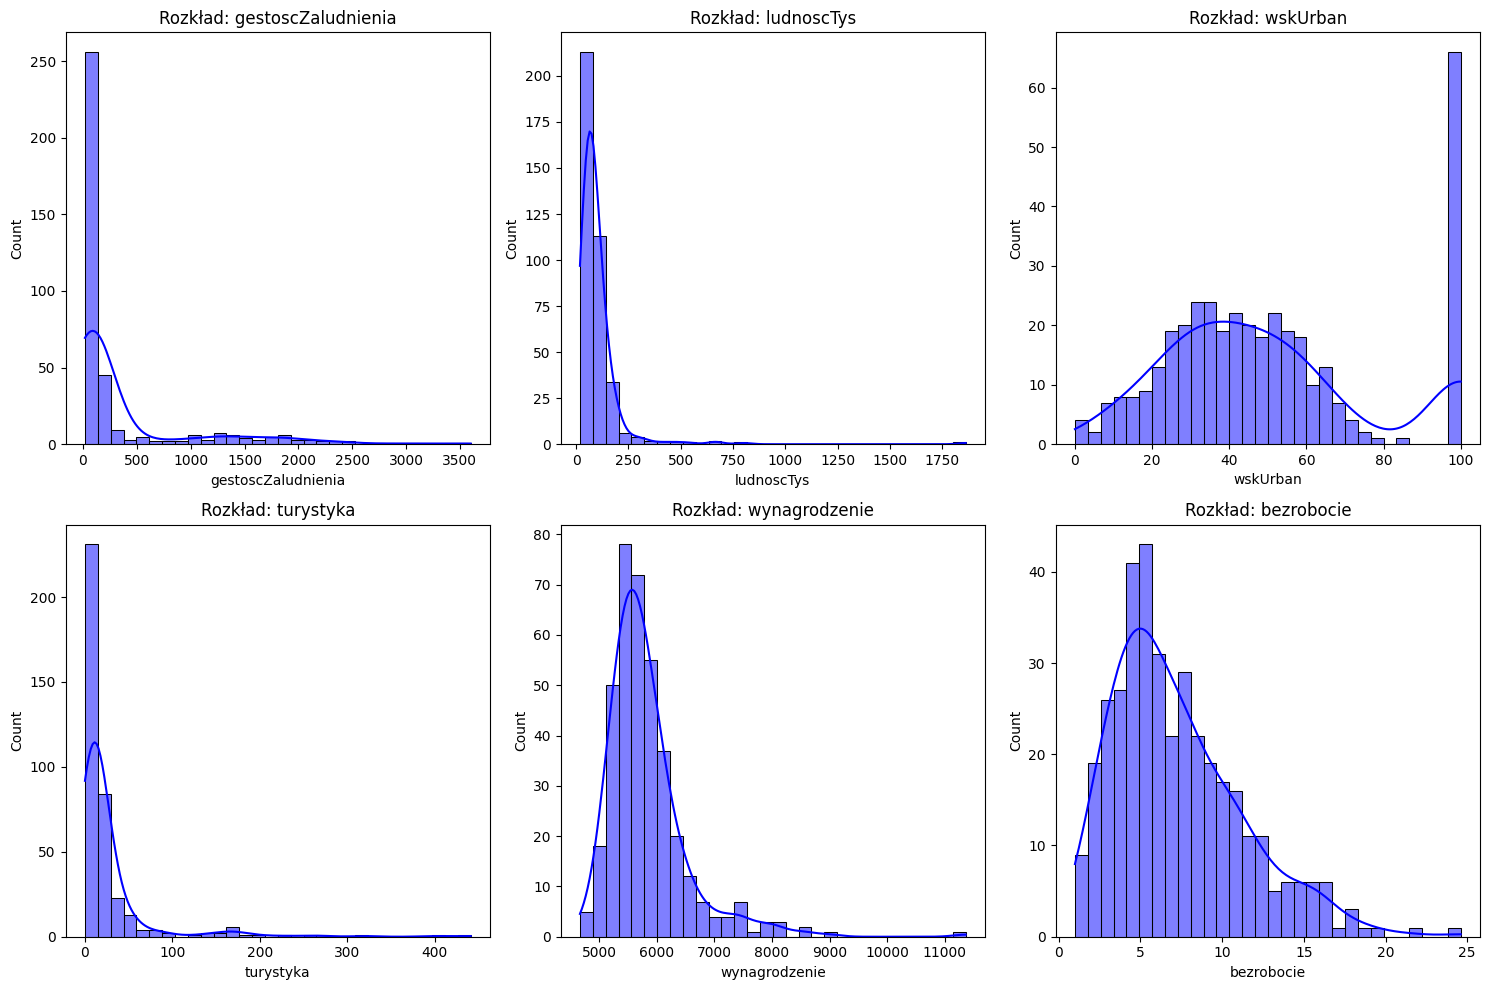

In [ ]:
# Analiza rozk≈Çad√≥w zmiennych liczbowych
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns[:6]
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Rozk≈Çad: {column}")
plt.tight_layout()
plt.show()

üìå Po zwizualizowaniu rozk≈Çad√≥w potwierdza siƒô wcze≈õniejszy wniosek wynikajƒÖcy ze statystyk opisowych - zmienne znacznie r√≥≈ºniƒÖ siƒô od siebie rozk≈Çadem oraz skalƒÖ, z uwagi na u≈ºycie regresji liniowej bƒôdzie konieczne zestandaryzowanie danych przed przej≈õciem do tworzenia modelu.

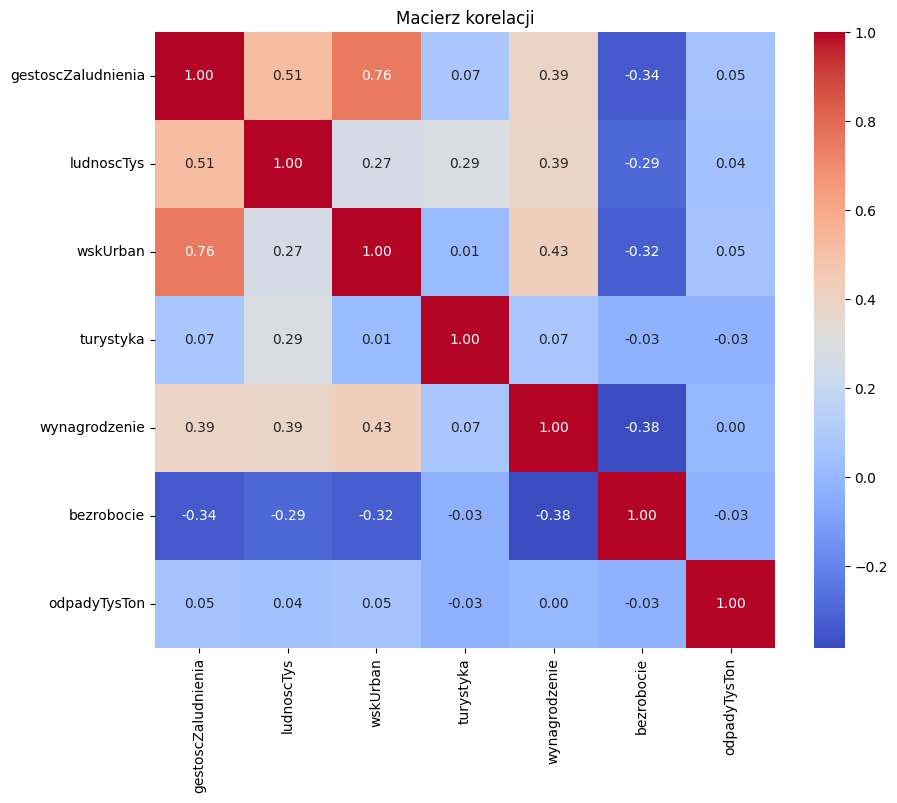

In [ ]:
# Macierz korelacji
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Macierz korelacji")
plt.show()

üìå Usuwamy zmienna wskaznikUrban poniewaz wykazuje wysokƒÖ korelacjƒô z gƒôsto≈õciƒÖ zaludnienia, a w modelu zmiene obja≈õniajƒÖce powinny byƒá silnie skorelowane ze zmiennƒÖ obja≈õnianƒÖ (odpady komunalne) ale nie powinny byƒá skorelowane miƒôdzy sobƒÖ.

In [ ]:
# Standaryzacja zmiennych liczbowych
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_standardized = df.copy()
df_standardized[numerical_columns] = scaler.fit_transform(df_standardized[numerical_columns])

# Usuniƒôcie kolumny wskUrban
df_standardized = df_standardized.drop(columns=['wskUrban'])

# Wy≈õwietlenie pierwszych wierszy po standaryzacji i usuniƒôciu kolumny (opcjonalnie)
df_standardized.head()

gestoscZaludnienia  ludnoscTys  turystyka  wynagrodzenie  bezrobocie  \
0           -0.459219   -0.092757  -0.176942       0.503620   -1.043607   
1           -0.247407   -0.028522  -0.136266      -0.145999   -0.517253   
2           -0.258572   -0.110797  -0.339647       0.042823   -0.216478   
3           -0.496222   -0.539163  -0.502352      -0.572326    1.638296   
4           -0.436251   -0.419108  -0.237956       0.448638    0.735973   

   odpadyTysTon  
0     -0.463797  
1      0.457919  
2     -0.326477  
3     -0.183910  
4     -0.074129

# Tworzenie modelu

In [ ]:
X = df_standardized  # Zmienne obja≈õniajƒÖce
if 'odpadyTysTon' in X.columns:
    X = X.drop(columns=['odpadyTysTon'])
y = df_y['odpadyTysTon']  # Zmienna obja≈õniana

In [ ]:
# dodanie sta≈Çej do modelu
X = sm.add_constant(X)
# Budowa modelu liniowego  przy u≈ºyciu metody najmniejszych kwadrat√≥w
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           odpadyTysTon   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.3959
Date:                Mon, 09 Dec 2024   Prob (F-statistic):              0.852
Time:                        14:08:54   Log-Likelihood:                -2049.6
No. Observations:                 380   AIC:                             4111.
Df Residuals:                     374   BIC:                             4135.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 35.3169      2

In [ ]:
# WyciƒÖgniƒôcie kluczowych metryk
r_squared = model.rsquared
adj_r_squared = model.rsquared_adj
f_statistic = model.fvalue
p_value = model.f_pvalue

print("\nPodstawowe miary jako≈õci dopasowania:")
print(f"R-kwadrat: {r_squared:.3f}")
print(f"Skorygowane R-kwadrat: {adj_r_squared:.3f}")
print(f"Statystyka F: {f_statistic:.3f} (p-value: {p_value:.3f})")


Podstawowe miary jako≈õci dopasowania:
R-kwadrat: 0.005
Skorygowane R-kwadrat: -0.008
Statystyka F: 0.396 (p-value: 0.852)


üìåTak s≈Çabe wyniki mogƒÖ wynikaƒá miƒôdzyinnymi z tego, ≈ºe w naszych zmiennych by≈Çy warto≈õci odstajƒÖce, postaramy siƒô je teraz usunƒÖƒá aby poprawiƒá wyniki modelu, nastƒôpnie powt√≥rzymy te same kroki.

In [ ]:
# Zidentyfikowanie outlier√≥w metodƒÖ IQR
def remove_outliers_iqr(df, columns, threshold=1.5):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Lista kolumn, z kt√≥rych chcemy usunƒÖƒá outliery
columns_to_check = ['gestoscZaludnienia', 'ludnoscTys', 'turystyka', 'wynagrodzenie', 'bezrobocie']

# Usuniƒôcie outlier√≥w
df_filtered = remove_outliers_iqr(df_standardized, columns_to_check)
df_filtered = df_filtered.reset_index(drop=True)

# Przygotowanie danych po usuniƒôciu outlier√≥w
X_filtered = df_filtered.drop(columns=['odpadyTysTon'])
if 'odpadyTysTon' in X_filtered.columns:
    X_filtered = X_filtered.drop(columns=['odpadyTysTon'])
y_filtered = df_filtered['odpadyTysTon']

# Standaryzacja zmiennych obja≈õniajƒÖcych
scaler = StandardScaler()
X_filtered = pd.DataFrame(scaler.fit_transform(X_filtered), columns=X_filtered.columns)

# Dodanie sta≈Çej do modelu
X_filtered = sm.add_constant(X_filtered)

# Budowa modelu liniowego po usuniƒôciu outlier√≥w
model_filtered = sm.OLS(y_filtered, X_filtered).fit()

# Wy≈õwietlenie wynik√≥w modelu
print(model_filtered.summary())

                            OLS Regression Results                            
Dep. Variable:           odpadyTysTon   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.818
Date:                Mon, 09 Dec 2024   Prob (F-statistic):              0.110
Time:                        14:08:58   Log-Likelihood:                -365.10
No. Observations:                 248   AIC:                             742.2
Df Residuals:                     242   BIC:                             763.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0216      0

In [ ]:
# Por√≥wnanie jako≈õci dopasowania z wcze≈õniejszym modelem
print("\nPor√≥wnanie jako≈õci dopasowania:")
print(f"R-kwadrat (po usuniƒôciu outlier√≥w): {model_filtered.rsquared:.3f}")
print(f"Skorygowane R-kwadrat (po usuniƒôciu outlier√≥w): {model_filtered.rsquared_adj:.3f}")


Por√≥wnanie jako≈õci dopasowania:
R-kwadrat (po usuniƒôciu outlier√≥w): 0.036
Skorygowane R-kwadrat (po usuniƒôciu outlier√≥w): 0.016


üìåWidzimy poprawƒô wynik√≥w chocia≈º dalej nie sƒÖ one idealne, mo≈ºe wynikaƒá to z faktu, ≈ºe nasze zmienne sƒÖ zmiennymi przestrzennymi, co nie jest uwzglƒôdniane przez model liniowy.

Statystyka Durbin-Watson (1.945):

Warto≈õƒá bliska 2 sugeruje brak autokorelacji reszt, co jest pozytywnym sygna≈Çem dla stabilno≈õci modelu.

Wiƒôkszo≈õƒá zmiennych ma wysokie p-warto≈õci (> 0.05), co oznacza brak istotnego wp≈Çywu na zmiennƒÖ zale≈ºnƒÖ.
Tylko wynagrodzenie jest statystycznie istotne (p = 0.008), co mo≈ºe oznaczaƒá, ≈ºe wp≈Çywa na odpadyTysTon



Przechodzimy do badania stabilno≈õci parametr√≥w modelu - przeprowadzamy test Chowa

In [ ]:
# Podzia≈Ç danych na dwie r√≥wne czƒô≈õci
split_index = len(X_filtered) // 2
X_part1, X_part2 = X_filtered.iloc[:split_index], X_filtered.iloc[split_index:]
y_part1, y_part2 = y_filtered.iloc[:split_index], y_filtered.iloc[split_index:]

# Oszacowanie modelu dla pierwszej czƒô≈õci
model_part1 = sm.OLS(y_part1, X_part1).fit()
SSE1 = np.sum(model_part1.resid ** 2)

# Oszacowanie modelu dla drugiej czƒô≈õci
model_part2 = sm.OLS(y_part2, X_part2).fit()
SSE2 = np.sum(model_part2.resid ** 2)

# Oszacowanie modelu dla ca≈Çego zbioru danych
model_full = sm.OLS(y_filtered, X_filtered).fit()
SSE_full = np.sum(model_full.resid ** 2)

# Obliczenie statystyki F dla testu Chow'a
k = X_filtered.shape[1]  # Liczba parametr√≥w (w tym sta≈Ça)
n1 = len(y_part1)
n2 = len(y_part2)

numerator = (SSE_full - (SSE1 + SSE2)) / k
denominator = (SSE1 + SSE2) / (n1 + n2 - 2 * k)
F_chow = numerator / denominator

# Obliczenie p-warto≈õci
df1 = k  # Stopnie swobody w liczniku
df2 = n1 + n2 - 2 * k  # Stopnie swobody w mianowniku
p_value = f.sf(F_chow, df1, df2)  # sf = 1 - cdf

print(f"Statystyka F dla testu Chow'a: {F_chow:.4f}")
print(f"p-value: {p_value:.4f}")

Statystyka F dla testu Chow'a: 0.4890
p-value: 0.8163


H‚ÇÄ (hipoteza zerowa): Parametry modelu sƒÖ takie same w obu podzbiorach (Model regresji jest stabilny, a dane mogƒÖ byƒá analizowane za pomocƒÖ jednego zestawu parametr√≥w.).


H‚ÇÅ (hipoteza alternatywna): Parametry modelu r√≥≈ºniƒÖ siƒô miƒôdzy podzbiorami (model nie jest stabilny).
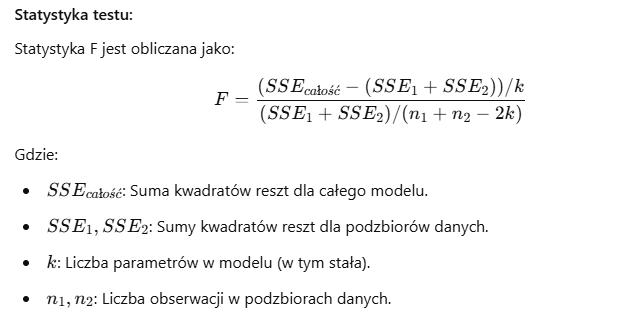

P-value wynosi 0.68 zatem jest brak podstaw do odrzucenia Hipotezy zerowej, przyjmujemy wiƒôc ≈ºe model jest stabilny.